All required imports

In [1]:
import numpy as np
import matplotlib as plt
import sklearn
import os
import pandas as pd
import keras

Using TensorFlow backend.
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\prajw\Anaconda3\envs\mlproj\lib\sit

This loads data into pandas dataframes

In [2]:
def get_data():
    try:
        root
    except:
        root = os.getcwd()

    data_path = os.path.join(root, "../skin-cancer-mnist-ham10000")

    # the associated meta data
    metadata = pd.read_csv(os.path.join(data_path, "HAM10000_metadata.csv"))

    # the pixels RGB
    X_pixels = pd.read_csv(os.path.join(data_path, "hmnist_28_28_RGB.csv"))
    
    return metadata, X_pixels
    
metadata, X_pixels = get_data()

In [3]:
print(metadata.shape)
metadata.head()

(10015, 7)


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [4]:
print(X_pixels.shape)
X_pixels.drop(['label'], axis=1,inplace = True)
X_pixels.head()

(10015, 2353)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2342,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351
0,192,153,193,195,155,192,197,154,185,202,...,134,173,124,138,183,147,166,185,154,177
1,25,14,30,68,48,75,123,93,126,158,...,82,60,39,55,25,14,28,25,14,27
2,192,138,153,200,145,163,201,142,160,206,...,149,167,129,143,159,124,142,136,104,117
3,38,19,30,95,59,72,143,103,119,171,...,73,44,26,36,25,12,17,25,12,15
4,158,113,139,194,144,174,215,162,191,225,...,201,209,166,185,172,135,149,109,78,92


Reformat metadata into X_metadata, categorical variables turned into one hot encoding, non-features removed.
Also make variable y into the classifications

In [5]:
X_metadata = metadata.loc[:, ['dx_type', 'age', 'sex', 'localization']]
X_metadata = pd.get_dummies(data=X_metadata, columns=['dx_type', 'sex', 'localization'])
X_metadata.head()

,age,dx_type_confocal,dx_type_consensus,dx_type_follow_up,dx_type_histo,sex_female,sex_male,sex_unknown,localization_abdomen,localization_acral,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,80.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,75.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = metadata.loc[:, 'dx']
y = pd.get_dummies(data=y, columns=['dx'])
y.head()

,akiec,bcc,bkl,df,mel,nv,vasc
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


Simply make X be the concatenation of X_pixels and X_metadata

In [7]:
X = pd.concat([X_metadata, X_pixels], axis = 1)
X.head()

print(X.to_numpy())

[[ 80.   0.   0. ... 185. 154. 177.]
 [ 80.   0.   0. ...  25.  14.  27.]
 [ 80.   0.   0. ... 136. 104. 117.]
 ...
 [ 40.   0.   0. ... 172. 151. 145.]
 [ 80.   0.   0. ... 185. 162. 172.]
 [ 70.   0.   0. ... 175. 139. 126.]]


In [15]:
import matplotlib.pyplot as plt
def scaleNVDown(metadata, scale_down):
    if scale_down:        
        only_nv = metadata.loc[metadata['dx'] == 'nv']
        rand_samp = np.random.choice(only_nv.index, size = 5500, replace = False)
        down_scale = metadata.drop(list(rand_samp), axis=0)

        graph = down_scale['dx'].value_counts().plot.bar() 
        graph.set_title("Data after scaling down nv", fontweight="bold")
        graph.set_xlabel("Labels", fontweight="bold")
        graph.set_ylabel("Count", fontweight="bold")
        plt.show()
        return down_scale
    else:
        return metadata

def removeLabels(metadata, remove_labels):
    if remove_labels:
        remove = metadata.loc[metadata['dx'].isin(['df', 'akiec', 'bcc', 'vasc'])]
        cleaned_dat = metadata.drop(remove.index, axis=0)
        
        graph = cleaned_dat['dx'].value_counts().plot.bar() 
        graph.set_title("Data after removing df, akiec, bcc, and vasc labels", fontweight="bold")
        graph.set_xlabel("Labels", fontweight="bold")
        graph.set_ylabel("Count", fontweight="bold")
        plt.show()
        return cleaned_dat, cleaned_dat['dx'].unique()
    else:
        return metadata, metadata['dx'].unique()

def pre_process(metadata, proportion, random_seed):    
    # convert strings to unique ints
    from sklearn import preprocessing as pp
    from sklearn.model_selection import train_test_split
    
    # Convert strings to unique ints to pass into classifier
    le = pp.LabelEncoder()
    metadata['dx_type'].iloc[:] = le.fit_transform(metadata['dx_type']).astype(np.float64)
    metadata['sex'].iloc[:] = le.fit_transform(metadata['sex']).astype(np.float64)
    metadata['localization'].iloc[:] = le.fit_transform(metadata['localization']).astype(np.float64)
    
    # Separate data into segments
    data = metadata['dx']
    bar_plot = data.value_counts()
    ids = metadata[['lesion_id', 'image_id']]
    features = metadata.drop(['lesion_id', 'image_id', 'dx'], axis=1)
    
    train_features, test_features, train_label, test_label = train_test_split(features, data, test_size=proportion, random_state=random_seed)
    
    return test_label.fillna(-1.0), test_features.fillna(-1.0), train_label.fillna(-1.0), train_features.fillna(-1.0)
  
def stat_graphs(test_label, label_pred, labels):
    from sklearn.metrics import classification_report, confusion_matrix
    pred_df = pd.DataFrame()
    pred_df["y_true"] = test_label
    pred_df["y_pred"] = label_pred
    pred_df.reset_index(inplace = True, drop = True)
    pred_df.to_csv("../Figures/svm_TF.csv")
    
    conf_matrix = confusion_matrix(test_label, label_pred)
    print('\nClassification Report')
    classification_report = classification_report(test_label, label_pred, target_names=labels) 
    print(classification_report)
    num_right = np.sum(test_label == label_pred)
    print(f"Accuracy {num_right / test_label.shape[0]} \n")
    
    return conf_matrix
    

def svm(metadata, size_of_test_data, random_seed, remove_labels, scale_down_NV):
    from sklearn.svm import SVC 
    
    graph = metadata['dx'].value_counts().plot.bar()
    graph.set_title("Original Data", fontweight="bold")
    graph.set_xlabel("Labels", fontweight="bold")
    graph.set_ylabel("Count", fontweight="bold")
    plt.show()
    
    # Process data and get the training and testing set
    metadata_v2 = scaleNVDown(metadata, scale_down_NV)
    metadata_v3, target = removeLabels(metadata_v2, remove_labels)
    test_label ,test_features ,train_label ,train_features = pre_process(metadata_v3, size_of_test_data, random_seed)
    
    # Run the model training and prediction
    svc = SVC()
    svc.fit(train_features, train_label)
    label_pred = svc.predict(test_features)

    # Plot the confusion matrix, store classification report, and store pred/true labels
    conf_matrix = stat_graphs(test_label, label_pred, target)
    return target, conf_matrix


def plot_conf_matrix(conf_matrix, labels, directory):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sn
    import pandas as pd
    import seaborn as sns
    import math
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib as mpl

    plt.style.use('seaborn')
    conf_arr = conf_matrix

    s = conf_arr.sum(axis = 1)
    conf_arr = (conf_arr * 100.0) / s[:,None]
    conf_arr = np.nan_to_num(conf_arr)
    df_cm = pd.DataFrame(conf_arr, 
      index = labels,
      columns = labels)
    
    fig = plt.figure()
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)

    plt.yticks(np.arange(len(labels)) + .5, labels,va='center')
    plt.title('Confusion Matrix')
    plt.xlabel("Prediction")
    plt.ylabel("Class")
    plt.savefig(directory, dpi=100, bbox_inches='tight' )
    plt.show()
    plt.close()


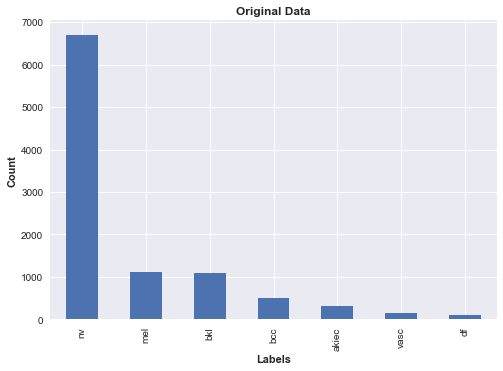

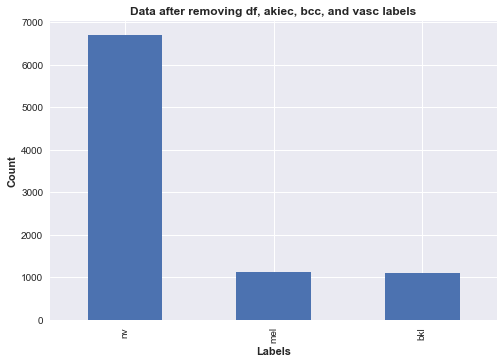

C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report
              precision    recall  f1-score   support

         bkl       0.61      0.40      0.49       229
          nv       0.45      0.22      0.29       222
         mel       0.84      0.96      0.90      1333

    accuracy                           0.80      1784
   macro avg       0.64      0.53      0.56      1784
weighted avg       0.76      0.80      0.77      1784

Accuracy 0.7982062780269058 



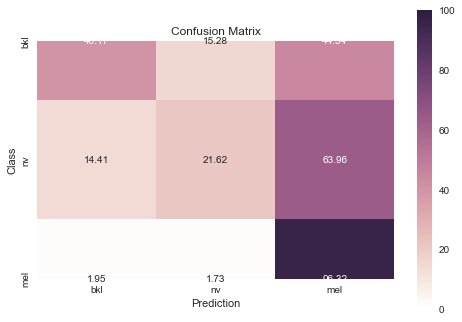

In [16]:
#################
# Edit params here for SVM

size_of_test_data = 0.2
random_seed = 42
remove_labels = True
scale_down_NV = False

#################
    
    
labels, conf_matrix = svm(metadata, size_of_test_data, random_seed, remove_labels, scale_down_NV)
plot_conf_matrix(conf_matrix, labels, '../Figures/confusion_matrix_svm.png')

(8012, 2375)
(8012,)


C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report
              precision    recall  f1-score   support

         bkl       0.00      0.00      0.00        69
          nv       0.00      0.00      0.00        93
          df       0.00      0.00      0.00       228
         mel       0.00      0.00      0.00        28
        vasc       0.00      0.00      0.00       226
         bcc       0.67      1.00      0.80      1338
       akiec       0.00      0.00      0.00        21

    accuracy                           0.67      2003
   macro avg       0.10      0.14      0.11      2003
weighted avg       0.45      0.67      0.54      2003

Accuracy 0.6679980029955067 



C:\Users\prajw\Anaconda3\envs\mlproj\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


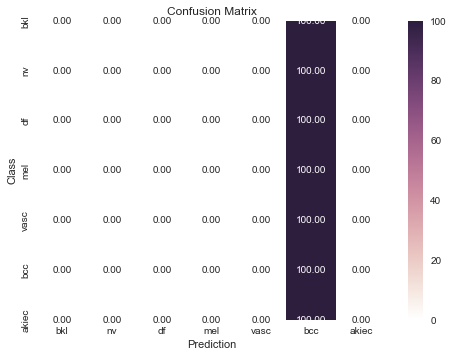

In [23]:
def svm2(data, labels):
    from sklearn.svm import SVC 
    from sklearn.model_selection import train_test_split
    
    data = data.fillna(0)
    train_features, test_features, train_label, test_label = train_test_split(data, metadata['dx'], test_size=0.2, random_state=42)
    svc = SVC()
    print(train_features.shape)
    print(train_label.shape)
    svc.fit(train_features, train_label)
    label_pred = svc.predict(test_features)

    # Plot the confusion matrix, store classification report, and store pred/true labels
    conf_matrix = stat_graphs(test_label, label_pred, labels['dx'].unique())
    return labels['dx'].unique(), conf_matrix
                                                                              
labels2, conf_mat = svm2(X, metadata)
plot_conf_matrix(conf_mat, labels2, '../Figures/confusion_matrix_svm2.png')